# SWMAL Exercise

## Learning Curves

### The Generalization Error, Over- and Underfitting, Early Stopping, and Optimal Capacity

In this exercise, we need to explain all important overall concepts in training. Let's begin with Figure 5.3 from Deep Learning (Ian Goodfellow, et. al. [DL]), which pretty much sums it all up

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/dl_generalization_error.png" alt="WARNING: could not get image from server." style="height:500px">


### Qa) The Generalization Error

Write a detailed description of figure 5.3 (above) for your hand-in.
 
All concepts in the figure must be explained 

* training/generalization error, 
* underfit/overfit zone, 
* optimal capacity, 
* generalization gab, 
* and the two axes: x/capacity, y/error.

In [ ]:
# TODO: ...in text
assert False, "TODO: write some text.."

### Qb Learning Curves

Next, produce a loss vs epoch graph ala (from `04_training_linear_models.ipynb` [GITHOML]) 

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/training_curve.png" alt="WARNING: could not get image from server.">


for your linear regressor, `MyLinReg`, from an earlier lesson. You need a function 

>```LossHistory()```

on your regressor class, that accumulates the internally calculated $J$'s. Once `LossHistory` is ready, plot it using the code below.

it:  1 
Loss:  1.7537211037899845
it:  2 
Loss:  1.6786445974010427
it:  3 
Loss:  1.6516876620180039
it:  4 
Loss:  1.6422059198633445
it:  5 
Loss:  1.6395586160098659
it:  6 
Loss:  1.6395610791825015
it:  7 
Loss:  1.640470632052324
it:  8 
Loss:  1.641564941042962
it:  9 
Loss:  1.6425663937283175
it:  10 
Loss:  1.643390631579914
it:  11 
Loss:  1.6440332134394242
it:  12 
Loss:  1.6445186431722203
it:  13 
Loss:  1.6448782191289673
it:  14 
Loss:  1.6451411818225208


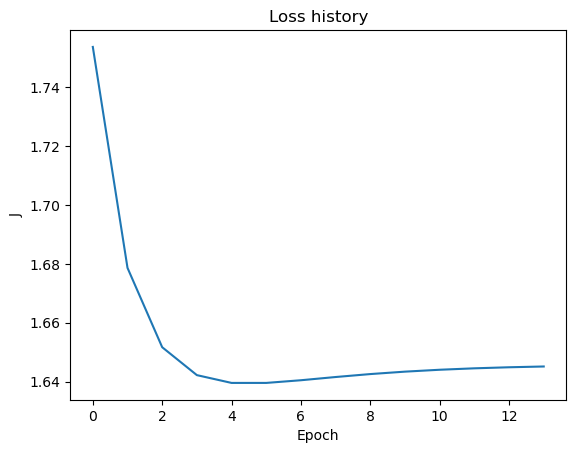

OK


In [ ]:
# assert False, "TODO: implement a J-history function on your linear regressor.."

from sklearn.preprocessing import add_dummy_feature

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)  
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)   
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y
# from L5 import MyLinReg
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class MyLinReg():
    def __init__(self, eta0=0.01, max_iter=10000, tol=1e-3, n_iter_no_change=5, verbose=True):
        self.eta0 = eta0
        self.max_iter = max_iter
        self.tolerance = tol
        self.n_iter_no_change = n_iter_no_change
        self.verbose = verbose
        self.coef = None # vores w
        self.intercept = None
        self.history = []
    
    def __str__(self):
        return "MyLinReg.__str__(): hi!"

    def fit(self, X, y, method):
        X = add_dummy_feature(X) # Augment med 1 taller
        assert X.shape[0] == y.shape[0], "X og y skal være lige store"
        self.coef = np.zeros(X.shape[1])
        prev_loss = 99999999999999999999 # brug numpy infity her
        no_change_counter = 0

        for ep in range(self.max_iter):
            if method == "GD":
                # GD
                y_pred = X @ self.coef
                error = y_pred - y
                gradient = X.T @ error / len(y) # hvor y_pred er Xw
                self.coef -= gradient * self.eta0
                # GD
            elif method == "SGD":
                # SGD
                for i in range(len(y)):
                    y_pred = X[i] @ self.coef
                    error = y_pred - y[i]
                    gradient = X[i] * error
                    self.coef -= gradient * self.eta0
                #SGD

            loss = np.sqrt(np.mean(((X @ self.coef) - y) ** 2)) # vores cost RMSE, som svarer til gennemsnit af (y_pred - y)^2 
            self.history.append(loss)

            print("it: ", ep+1, "\nLoss: ", loss)

            # tjek om den improver
            if abs(prev_loss - loss) < self.tolerance:
                no_change_counter += 1
            else:
                no_change_counter = 0
                # prev_loss = loss

            prev_loss = loss
            if no_change_counter >= self.n_iter_no_change:
                break
            
        self.intercept = self.coef[0]
        self.coef = self.coef[1:]

    def predict(self, X):
        X = add_dummy_feature(X)
        return X @ np.r_[self.intercept, self.coef]

    def score(self, X, y_true):
        # hvordan kan vi uden at add en dummy her?
        y_pred = self.predict(X)
        sum_squares_total = np.sum((y_true - np.mean(y_true))**2)
        sum_squares_residual = np.sum((y_true - y_pred)**2)
        return 1 - (sum_squares_residual / sum_squares_total) # Scoren

    def LossHistory(self):
        return self.history

# generer noget  data
X, y = GenerateSimpleData()

X = X / np.max(X)

r = MyLinReg()
r.fit(X, y, "SGD")

h = r.LossHistory()

# Plot of J vs. epoch (or perhaps iteration)...
fig, ax = plt.subplots()
plt.plot(h)

ax.set_title("Loss history")
ax.set_xlabel("Epoch")
ax.set_ylabel("J")

plt.show()

print("OK")

### Qc)  Early Stopping

Then implement ___early stopping___, in your `MyLinReg` estimator. Below is a graphical view of early stopping similar to Figure 4-20 p.162 [HOML] (for a non-linear model?)

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/early_stopping.png" alt="WARNING: could not get image from server.">

Write an explanation of the early stopping concept in text, implement it in your linear regressor and write some test/demo code, that via some learning-curve graphs demonstrates how it works when training your linear regressor in both _batch-gradient descent_ and 
_stochastic gradient descent_ modes.

it:  1 
Loss:  1.7537211037899845
it:  2 
Loss:  1.6786445974010427
it:  3 
Loss:  1.6516876620180039
it:  4 
Loss:  1.6422059198633445
it:  5 
Loss:  1.6395586160098659
it:  6 
Loss:  1.6395610791825015
it:  7 
Loss:  1.640470632052324
it:  8 
Loss:  1.641564941042962
it:  9 
Loss:  1.6425663937283175
it:  10 
Loss:  1.643390631579914
it:  11 
Loss:  1.6440332134394242
it:  12 
Loss:  1.6445186431722203
it:  13 
Loss:  1.6448782191289673
it:  14 
Loss:  1.6451411818225208


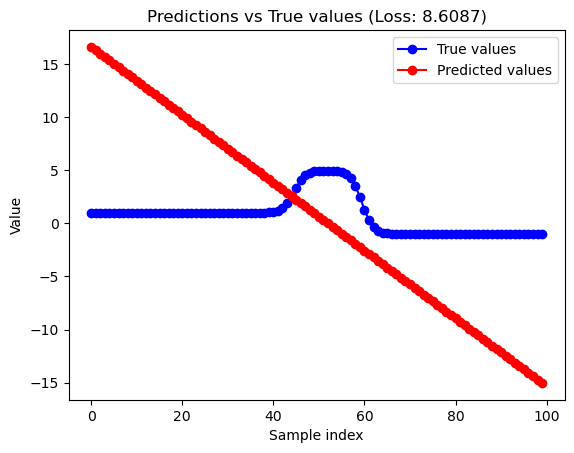

In [ ]:
# assert False, "TODO: implement early stopping
# NY DATA WOOO


X_test, y_test = GenerateSimpleData()

X_test = X_test / np.max(X_test)

r.fit(X, y, "SGD")

# predict
y_pred = r.predict(X_test)

# loss for vores cv / nye test data
loss_test = np.sqrt(np.mean((y_pred - y_test) ** 2))

#plot plot
fig, ax = plt.subplots()
ax.plot(range(len(y_test)), y_test, 'bo-', label='True values')
ax.plot(range(len(y_pred)), y_pred, 'ro-', label='Predicted values')
ax.set_title(f"Predictions vs True values (Loss: {loss_test:.4f})")
ax.set_xlabel("Sample index")
ax.set_ylabel("Value")
ax.legend()
plt.show()

### Qd:  [OPTIONAL]  Using a Polynomial Regressor to Produce an Error-vs-Capacity Graph

Finally, create a polynomial estimator based on your `MyLinReg`, see details of
how to expend a linear regressor to a polynomial fitting in [HOLM] or in

> https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
 
that contains most of the code you will need. 
 
With a polynomial regressor, you should be able to reproduce a graph similar to Figure 5.3 from Deep Learning [DL], where you notice that the _x-axis_ is capacity and not _epoch_ as the learning curves you just produced in Qb/c.

In [ ]:
assert False "TODO: implement a polynomial-fit pipeline, and create an Error-vs-Capacity plot..

pipeline = Pipeline([
      ("polynomial_features", polynomial_features),
      ("linear_regression",   MyLinReg())
  ])


### Qe Conclusion

Sum it all up in a nice, well-written conclusion.

REVISIONS||
:-|:-
2018-12-19| CEF, initial.                  
2018-02-14| CEF, major update and put in sync with under/overfitting exe.         
2018-02-20| CEF, fixed revision table malformatting.
2018-02-25| CEF, minor text updates, and made Qc optional.
2018-02-25| CEF, updated code, made more functions.
2018-03-11| CEF, corrected RSME to RMSE.
2019-10-08| CEF, updated to ITMAL E19.
2020-03-14| CEF, updated to ITMAL F20.
2020-10-15| CEF, updated to ITMAL E20.
2020-11-17| CEF, added a comment on 90-degree polynomial, made early stopping a pseudo code exe.
2021-03-22| CEF, changed crossref from "capacity_under_overfitting.ipynb Qc" to Qa+b in QdExplain the Polynomial RMSE-Capacity Plot. 
2021-03-23| CEF, changed 'cv RMSE' legend to 'validation RMSE'.
2021-10-31| CEF, updated to ITMAL E21.
2022-03-25| CEF, updated to SWMAL F22.
2023-03-16| CEF, minor update to SWMAL F23.
2024-09-25| CEF, major update, combined  generalization_error.ipynb and capacity_under_overfitting.ipynb, removed review parts, added graphs plots for MyLinReg.
2024-10-14| CEF, minor text updates.